Assignment 4

COMP 5600/6600

Due: 11/17/2023 11:59 pm

[Question 1] [50 points]

Overview:

In this assignment, you will apply dynamic programming techniques to solve
a simple Markov Decision Process (MDP) problem. MDPs are commonly
used to model sequential decision-making problems, and dynamic
programming is a powerful approach to find the optimal policy and value
function.

Problem Statement:

Imagine a simple grid world with the following characteristics:

• The grid world is represented as an 25x25 grid.

• Each cell in the grid can be in one of three states: empty, blocked, or
goal.

• The goal state is always in the left most point i.e., the cell in the 1st row
and 1st column.

• Empty cells can be traversed by an agent.

• Blocked cells are obstacles and cannot be traversed.

• The goal cell is where the agent should reach.

• The agent can move in four directions: up, down, left, and right. It
cannot move diagonally.

• At each time step, the agent can choose to move in one of the available
directions or stay in the same cell.

• The agent receives a reward of -1 for each time step it takes to reach
the goal cell.

• The agent cannot leave the grid or move into blocked cells.

Your Tasks:

1. Define the MDP for the given grid world. You need to specify the state
space, action space, transition probabilities, reward function, and
discount factor.
2. Implement the policy iteration using dynamic programming algorithms
to solve the MDP. Here is a simple pseudocode as a refresher:

  a. Start with an initial random policy.

  b. Implement policy evaluation to calculate the value function for
the policy.

  c. Implement policy improvement to update the policy based on the
value function.

  d. Repeat policy evaluation and improvement until the policy
converges.

3. Visualize the results:
a. Show the optimal policy found using both policy iteration and
value iteration.
b. Calculate and display the optimal value function.
4. Write a report describing your approach to the problem. It must contain
the following:

  a. The choice of data structure to implement the MDP and a
justification

  b. The performance of a random policy. You can compute it by
greedily evaluating it and reporting the median (out of three trials)
number of steps it took to reach the goal state from 3 different
start states. You can randomly choose these states for your
experiments.

  c. The performance of an intermediate policy obtained during policy
iteration. You can compute it by greedily evaluating it and
reporting the median (out of three trials) number of steps it took
to reach the goal state from 3 different start states. You should
use the same start states as defined in the previous section for
your experiments.

  d. The performance of the optimal policy found using your
approach. You can compute it by greedily evaluating it and
reporting the median (out of three trials) number of steps it took
to reach the goal state from 3 different start states. You should
use the same start states as defined in the previous section for
your experiments.

Your code must be written in Python as an IPython Notebook and must be
executable on Google Colab. You should write the report as text cells in the
Colab notebook and submit a single IPython notebook as your solution for
this assignment.


NUMBER OF ITERATIONS TO GET POLICY IS: 24
We'll use policy 12 out of 24 for our intermediate choice.


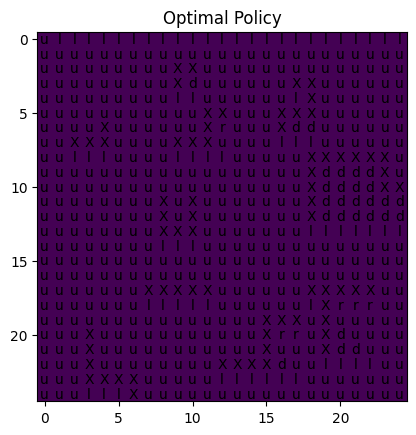

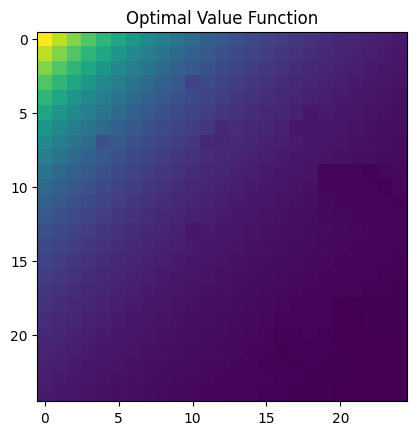







--------------------------------------------------
RUNNING START POINT = (1, 1)
--------------------------------------------------
--------------------------------------------------
STARTING RANDOM
Random took: 27 steps
--------------------------------------------------
STARTING INTERMEDIATE
Intermediate took: 2 steps
--------------------------------------------------
STARTING OPTIMAL
Optimal took: 2 steps






--------------------------------------------------
RUNNING START POINT = (12, 15)
--------------------------------------------------
--------------------------------------------------
STARTING RANDOM
CURRENT STEPS 250
Random took: 271 steps
--------------------------------------------------
STARTING INTERMEDIATE
Intermediate took: 27 steps
--------------------------------------------------
STARTING OPTIMAL
Optimal took: 27 steps






--------------------------------------------------
RUNNING START POINT = (24, 24)
--------------------------------------------------
------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

GRID_SIZE = 25
GOAL_STATE = (0,0)
BLOCKED_CELLS = [(7,2),(7,3),(7,4),(6,4),
                 (3,9),(2,9),(2,10),
                 (5,11),(5,12),(6,11),(7,9),(7,10),(7,11),
                 (6,16),(5,16),(5,17),(5,18),(4,18),(3,17),(3,18),
                 (8,18),(8,19),(8,20),(8,21),(8,22),(8,23),(9,18),(9,23),(10,18),(10,23),(10,24),(11,18),(12,18),
                 (11,8),(11,10),(12,8),(12,10),(13,8),(13,9),(13,10),
                 (17,7),(17,8),(17,9),(17,10),(17,11),
                 (17,18),(17,19),(17,20),(17,21),(17,22),(18,19),(19,19),(20,19),(21,19),
                 (19,15),(19,16),(19,17),(20,15),(21,15),(22,12),(22,13),(22,14),(22,15),
                 (20,3),(21,3),(22,3),(23,3),(23,4),(23,5),(23,6),(24,6)
                 ]
ACTION_SPACE = ['up', 'down', 'left', 'right', 'stay']
DISCOUNT_FACTOR = 0.9

# Task 1: Define the MDP

# State Space
# Easy lookup to compare state to index
state_space = [(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)]

# Transition Probabilities
def get_next_state(state, action):
    i, j = state

    # Make sure that we can't exit bounds
    if action == 'up':
        i = max(0, i - 1)
    elif action == 'down':
        i = min(GRID_SIZE - 1, i + 1)
    elif action == 'left':
        j = max(0, j - 1)
    elif action == 'right':
        j = min(GRID_SIZE - 1, j + 1)

    if (i, j) in BLOCKED_CELLS:
        i, j = state

    return (i, j)

transition_probs = {(state, action): get_next_state(state, action) for state in state_space for action in ACTION_SPACE}

# Reward Function
# Set the goal state to have a reward of 0, everything else has a reward of -1
reward_function = {(state, action): -1 if state != GOAL_STATE else 0 for state in state_space for action in ACTION_SPACE}

# Task 2: Implement Policy Iteration

# Initialize the policy randomly
policy = np.random.choice(ACTION_SPACE, size=(GRID_SIZE, GRID_SIZE))

# Initialize the value function
V = np.zeros((GRID_SIZE, GRID_SIZE))

# Policy Iteration
policies = []
while True:
    # Policy Evaluation
    while True:
        delta = 0
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                state = (i, j)
                action = policy[i, j]
                next_state = transition_probs[(state, action)]

                new_value = reward_function[(state, action)] + DISCOUNT_FACTOR * V[next_state[0], next_state[1]]
                delta = max(delta, abs(new_value - V[i, j]))
                V[i, j] = new_value

        if delta < 1e-6:
            break

    # Policy Improvement
    policy_stable = True
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            state = (i, j)
            old_action = policy[i, j]

            action_values = [-1 + DISCOUNT_FACTOR * V[transition_probs[(state, a)][0], transition_probs[(state, a)][1]] for a in ACTION_SPACE]
            new_action = ACTION_SPACE[np.argmax(action_values)]

            policy[i, j] = new_action

            if old_action != new_action:
                policy_stable = False

    policies.append(policy.copy())
    if policy_stable:
        break

print("NUMBER OF ITERATIONS TO GET POLICY IS:", len(policies))
int_policy_index = len(policies) // 2
print(f"We'll use policy {int_policy_index} out of {len(policies)} for our intermediate choice.")
# Task 3: Visualize the Results

# Visualization of Optimal Policy
plt.imshow(np.zeros((GRID_SIZE, GRID_SIZE)))
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) in BLOCKED_CELLS:
            plt.text(j, i, 'X', ha='center', va='center')
        else:
            plt.text(j, i, policy[i, j][0], ha='center', va='center')

plt.title("Optimal Policy")
plt.show()

# Visualization of Optimal Value Function
plt.imshow(V, cmap='viridis')
plt.title("Optimal Value Function")
plt.show()

# We need to look at the number of steps for:
# RANDOM -- 25% chance of going any given direction
# INTERMEDIATE -- Intermediate policy that we determined
# CHOSEN -- Optimal policy determined from our algorithm

def run_random(start_point):
  print("-"*50)
  print("STARTING RANDOM")
  not_solved = True
  cur_pos = start_point
  steps_count = 0
  while not_solved:
    # Make sure this actually works
    if steps_count % 250 == 0 and steps_count != 0:
      print("CURRENT STEPS", steps_count)

    # Choose random direction
    delta_x, delta_y = random.choice([(0,1), (0,-1), (1,0), (-1,0)])

    new_pos = cur_pos[0] + delta_x, cur_pos[1] + delta_y

    steps_count += 1  # Increment step even if we're unable to actually move

    # Make sure that this new position is valid
    if not (0 <= new_pos[0] < GRID_SIZE and 0 <= new_pos[1] < GRID_SIZE and new_pos not in BLOCKED_CELLS):
      continue

    cur_pos = new_pos

    # Check to see if solved
    if cur_pos == GOAL_STATE:
      not_solved = False

  print("Random took:", steps_count, "steps")

def run_intermediate(start_point):
  print("-"*50)
  print("STARTING INTERMEDIATE")
  not_solved = True
  cur_pos = start_point
  steps_count = 0
  while not_solved:
    # Make sure this actually works
    if steps_count > 625:
      print("Intermediate policy had not found solvable path yet!")
      break

    # Choose direction recommended by policy
    conversions = {
        'down': (1, 0),
        'up': (-1, 0),
        'left': (0, -1),
        'right': (0, 1),
        'stay': (0, 0)
    }
    direction = conversions[policies[int_policy_index][cur_pos[0]][cur_pos[1]]]
    new_pos = (cur_pos[0] + direction[0], cur_pos[1] + direction[1])

    steps_count += 1  # Increment step even if we're unable to actually move

    # Make sure that this new position is valid
    if not (0 <= new_pos[0] < GRID_SIZE and 0 <= new_pos[1] < GRID_SIZE and new_pos not in BLOCKED_CELLS):
      continue

    cur_pos = new_pos

    # Check to see if solved
    if cur_pos == GOAL_STATE:
      not_solved = False

  if not not_solved:
    print("Intermediate took:", steps_count, "steps")

def run_optimal(start_point):
  print("-"*50)
  print("STARTING OPTIMAL")
  not_solved = True
  cur_pos = start_point
  steps_count = 0
  while not_solved:
    # Make sure this actually works
    if steps_count > 625:
      print("Something went wrong!")
      break

    # Choose direction recommended by policy
    conversions = {
        'down': (1, 0),
        'up': (-1, 0),
        'left': (0, -1),
        'right': (0, 1),
        'stay': (0, 0)
    }
    direction = conversions[policy[cur_pos[0]][cur_pos[1]]]
    new_pos = (cur_pos[0] + direction[0], cur_pos[1] + direction[1])

    steps_count += 1  # Increment step even if we're unable to actually move

    # Make sure that this new position is valid
    if not (0 <= new_pos[0] < GRID_SIZE and 0 <= new_pos[1] < GRID_SIZE and new_pos not in BLOCKED_CELLS):
      continue

    cur_pos = new_pos

    # Check to see if solved
    if cur_pos == GOAL_STATE:
      not_solved = False

  if not not_solved:
    print("Optimal took:", steps_count, "steps")

start_point_list = [(1, 1), (12, 15), (24, 24)]
for start_point in start_point_list:
  print("\n"*5)
  print("-"*50)
  print("RUNNING START POINT =", start_point)
  print("-"*50)
  run_random(start_point)
  run_intermediate(start_point)
  run_optimal(start_point)




Report:

In this project I used multiple datastures for different part of the program. I made my blocked cells and action space as lists. I also created two dictionaries one for the transition probabilites and one for the rewards.Then I implemented the policy as an array of strings denoting the action taken in each state and an array representing the value fucntion at each state.

Preformances:

  Random Policy:

    start state(1,1): 27 steps
    start state(12,15): 271 steps
    start state(24,24): 7388 steps
  Median for Random Policy: 271 steps

  Intermediate Policy:

    start state(1,1): 2 steps
    start state(12,15): 27 steps
    start state(24,24): had not converged yet
  Median for Intermediate Policy: 14.5 steps

  Optimal Policy:

    start state(1,1): 2 steps
    start state(12,15): 27 steps
    start state(24,24): 48 steps
  Median for Optimal Policy: 27 steps